In [131]:
import pandas as pd
import os
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

# Avoiding warnings

import warnings
warnings.filterwarnings("ignore")

# 1. Data Preparation (cleaning and engineering)

## 1.1. Dublin Bikes

First we will loop through the files in order to concatenate the 12 complementary files into a single dataframe for the whole year of 2023.
Dataset available at: 

Dataset available at: https://data.smartdublin.ie/dataset/dublinbikes-api


Font: https://medium.com/@nawazmohtashim/method-to-merge-csv-files-in-python-8b0f16550e0b

In [5]:
# Listing the files and sorting them by name in the dublin_data folder so they do not have to be typed one by one. Adapted from: https://stevenhough.medium.com/how-to-easily-list-all-files-in-a-folder-using-python-3-ee06004c6316

folder_path = '/home/user/Documents/GitHub/dublin_data'

file_list = sorted([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(file_list)

['.DS_Store', '._.DS_Store', '._dublinbike-historical-data-2022-01.csv', '._dublinbike-historical-data-2022-02.csv', '._dublinbike-historical-data-2022-03.csv', '._dublinbike-historical-data-2022-04.csv', '._dublinbike-historical-data-2022-05.csv', '._dublinbike-historical-data-2022-06.csv', '._dublinbike-historical-data-2022-07.csv', '._dublinbike-historical-data-2022-08.csv', '._dublinbike-historical-data-2022-09.csv', '._dublinbike-historical-data-2022-10.csv', '._dublinbike-historical-data-2022-11.csv', '._dublinbike-historical-data-2022-12.csv', 'Dublinbike_historical_data_2022.csv', 'dublinbike-historical-data-2022-01.csv', 'dublinbike-historical-data-2022-02.csv', 'dublinbike-historical-data-2022-03.csv', 'dublinbike-historical-data-2022-04.csv', 'dublinbike-historical-data-2022-05.csv', 'dublinbike-historical-data-2022-06.csv', 'dublinbike-historical-data-2022-07.csv', 'dublinbike-historical-data-2022-08.csv', 'dublinbike-historical-data-2022-09.csv', 'dublinbike-historical-dat

In [6]:
# Creating a list with the files.

months_dfs = ['/home/user/Documents/GitHub/dublin_data/dublinbike-historical-data-2022-01.csv', '/home/user/Documents/GitHub/dublin_data/dublinbike-historical-data-2022-02.csv', '/home/user/Documents/GitHub/dublin_data/dublinbike-historical-data-2022-03.csv', 
              '/home/user/Documents/GitHub/dublin_data/dublinbike-historical-data-2022-04.csv', '/home/user/Documents/GitHub/dublin_data/dublinbike-historical-data-2022-05.csv', '/home/user/Documents/GitHub/dublin_data/dublinbike-historical-data-2022-06.csv',
              '/home/user/Documents/GitHub/dublin_data/dublinbike-historical-data-2022-07.csv', '/home/user/Documents/GitHub/dublin_data/dublinbike-historical-data-2022-08.csv', '/home/user/Documents/GitHub/dublin_data/dublinbike-historical-data-2022-09.csv',
              '/home/user/Documents/GitHub/dublin_data/dublinbike-historical-data-2022-10.csv', '/home/user/Documents/GitHub/dublin_data/dublinbike-historical-data-2022-11.csv', '/home/user/Documents/GitHub/dublin_data/dublinbike-historical-data-2022-12.csv']

In [7]:
df_dublin = pd.DataFrame()

# For loop for merging data
for monthsdfs in months_dfs:
    df = pd.read_csv(monthsdfs)
    df_dublin = pd.concat([df_dublin, df], ignore_index=True)

# Saving a new .csv file with the merged data
df_dublin.to_csv('Dublinbike_historical_data_2022.csv', index=False)

In [8]:
df_dublin = pd.read_csv('/home/user/Documents/GitHub/dublin_data/Dublinbike_historical_data_2022.csv')

Inspect the data.

In [10]:
df_dublin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950289 entries, 0 to 1950288
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   STATION ID             int64  
 1   TIME                   object 
 2   LAST UPDATED           object 
 3   NAME                   object 
 4   BIKE_STANDS            int64  
 5   AVAILABLE_BIKE_STANDS  int64  
 6   AVAILABLE_BIKES        int64  
 7   STATUS                 object 
 8   ADDRESS                object 
 9   LATITUDE               float64
 10  LONGITUDE              float64
dtypes: float64(2), int64(4), object(5)
memory usage: 163.7+ MB


In [11]:
df_dublin.head(3)

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,2,2022-01-01 00:00:04,2021-12-31 23:57:39,BLESSINGTON STREET,20,10,10,OPEN,Blessington Street,53.3568,-6.26814
1,3,2022-01-01 00:00:04,2021-12-31 23:49:57,BOLTON STREET,20,19,1,OPEN,Bolton Street,53.3512,-6.26986
2,4,2022-01-01 00:00:04,2021-12-31 23:58:39,GREEK STREET,20,9,11,OPEN,Greek Street,53.3469,-6.27298


Handling missing data.

In [13]:
df_dublin.isnull().sum()

STATION ID               0
TIME                     0
LAST UPDATED             0
NAME                     0
BIKE_STANDS              0
AVAILABLE_BIKE_STANDS    0
AVAILABLE_BIKES          0
STATUS                   0
ADDRESS                  0
LATITUDE                 0
LONGITUDE                0
dtype: int64

Filtering the dataset by status.

In [15]:
# Checking unique statuses in 'STATUS' since we are only using stations that are open.

statuses_status = df_dublin['STATUS'].unique()
status_numbers = df_dublin['STATUS'].value_counts()

statuses_status, status_numbers

(array(['OPEN', 'CLOSED'], dtype=object),
 STATUS
 OPEN      1948271
 CLOSED       2018
 Name: count, dtype: int64)

In [16]:
# Filtering the dataset to only 'OPEN' statuses.

df_dublin = df_dublin[df_dublin['STATUS'] == 'OPEN']

Datatype transforming.

In [18]:
# Tranforming the column 'TIME' to datetime format.

df_dublin['TIME']= pd.to_datetime(df_dublin['TIME'])

Dropping, renaming and detecting duplicates.

In [20]:
# Dropping redundant / unecessary columns.

drop_column_dublin_1 = ['LAST UPDATED','ADDRESS', 'STATUS']
df_dublin = df_dublin.drop(columns = drop_column_dublin_1)

In [21]:
# Renaming columns for better vizualisation.

df_dublin.rename(columns={'STATION ID': 'station_id','TIME': 'time', 'NAME': 'station', 'BIKE_STANDS': 'n_stands',
                            'AVAILABLE_BIKE_STANDS': 'available_stands','AVAILABLE_BIKES': 'available_bikes',
                         'LATITUDE': 'lat', 'LONGITUDE': 'long' }, inplace=True)

In [22]:
# Detecting duplicates (It is very unlikely there are duplicates due to the origin of the data, but it will be performed just in case).
# If it is 'False', there are no duplicated rows in the dataset.

dupli = df_dublin.duplicated().any()

print(f'Are there any duplicated rows in the whole dataset? {dupli}')

Are there any duplicated rows in the whole dataset? False


In [23]:
df_dublin.head(5)

,station_id,time,station,n_stands,available_stands,available_bikes,lat,long
0,2,2022-01-01 00:00:04,BLESSINGTON STREET,20,10,10,53.3568,-6.26814
1,3,2022-01-01 00:00:04,BOLTON STREET,20,19,1,53.3512,-6.26986
2,4,2022-01-01 00:00:04,GREEK STREET,20,9,11,53.3469,-6.27298
3,5,2022-01-01 00:00:04,CHARLEMONT PLACE,40,17,23,53.3307,-6.26018
4,6,2022-01-01 00:00:04,CHRISTCHURCH PLACE,20,13,7,53.3434,-6.27012


### Data engineering for specific data and creation of lighter datasets for diferent analysis.

Dataset: Number of trips

In [26]:
# Sorting rows by station_id and time.

dublin_filtered_station_time = df_dublin.sort_values(by=['station_id', 'time'])

In [27]:
# Calculating number of trips per row (ended and started).
# Obs: There is a slight modifycation in the lambda function since 'ended' and 'started'(lambda x: -x in
# comparison to lambda x: x) as the number of the current available bikes / available stands subtracted from the previous number will 
# dictate if it is a starting or ending trip. (AS + / AB - = Trips started; AS - / AB + = Trips ended)

dublin_filtered_station_time['trips_started'] = dublin_filtered_station_time.groupby('station_id')['available_bikes'].diff().fillna(0)
dublin_filtered_station_time['trips_started'] = dublin_filtered_station_time['trips_started'].apply(lambda x: -x if x < 0 else 0)

dublin_filtered_station_time['trips_ended'] = dublin_filtered_station_time.groupby('station_id')['available_bikes'].diff().fillna(0)
dublin_filtered_station_time['trips_ended'] = dublin_filtered_station_time['trips_ended'].apply(lambda x: x if x > 0 else 0)

dublin_filtered_station_time['total_trips_per_station'] = dublin_filtered_station_time ['trips_started']+dublin_filtered_station_time['trips_ended']


In [28]:
dublin_filtered_station_time.head()

,station_id,time,station,n_stands,available_stands,available_bikes,lat,long,trips_started,trips_ended,total_trips_per_station
614868,1,2022-04-27 13:00:02,CLARENDON ROW,31,27,0,53.3409,-6.2625,0.0,0.0,0.0
614980,1,2022-04-27 13:30:02,CLARENDON ROW,31,27,0,53.3409,-6.2625,0.0,0.0,0.0
615092,1,2022-04-27 14:00:02,CLARENDON ROW,31,27,0,53.3409,-6.2625,0.0,0.0,0.0
615204,1,2022-04-27 14:30:02,CLARENDON ROW,31,0,0,53.3409,-6.2625,0.0,0.0,0.0
615316,1,2022-04-27 15:00:02,CLARENDON ROW,31,0,0,53.3409,-6.2625,0.0,0.0,0.0


In [29]:
# Calculating totals

dublin_total_trips = dublin_filtered_station_time.groupby(['station_id', 'station'])[['trips_started', 'trips_ended', 'total_trips_per_station']].sum().reset_index()
dublin_total_trips = dublin_filtered_station_time.groupby(['station_id', 'station'])[['trips_started', 'trips_ended', 'total_trips_per_station']].sum().reset_index()



In [30]:
# Transforming columns datatypes


dublin_total_trips['trips_started'] = dublin_total_trips['trips_started'].astype(int)
dublin_total_trips['trips_ended'] = dublin_total_trips['trips_ended'].astype(int)
dublin_total_trips['total_trips_per_station'] = dublin_total_trips['total_trips_per_station'].astype(int)


In [31]:
dublin_total_trips.tail()

,station_id,station,trips_started,trips_ended,total_trips_per_station
110,114,WILTON TERRACE (PARK),13717,13711,27428
111,115,KILLARNEY STREET,10800,10780,21580
112,116,BROADSTONE,5015,5008,10023
113,117,HANOVER QUAY EAST,4691,4689,9380
114,507,ORIEL STREET TEST TERMINAL,0,0,0


Dataset: Total trips per time.

In [33]:
# Filtering data

dublin_trips_per_time = dublin_filtered_station_time[['station_id', 'station', 'time', 'total_trips_per_station']]

In [133]:
# Creating columns for 'weeday' and 'month'

dublin_trips_per_time.loc[:, 'weekday'] = dublin_trips_per_time['time'].dt.isocalendar().day
dublin_trips_per_time.loc[:, 'month'] = dublin_trips_per_time['time'].dt.month

dublin_trips_per_time = dublin_trips_per_time[['station_id', 'station', 'time','weekday', 'month', 'total_trips_per_station']]

In [147]:
# Transforming columns datatype

dublin_trips_per_time['total_trips_per_station'] = dublin_trips_per_time['total_trips_per_station'].astype(int)

In [149]:
dublin_trips_per_time.head()

,station_id,station,time,weekday,month,total_trips_per_station
614868,1,CLARENDON ROW,2022-04-27 13:00:02,3,4,0
614980,1,CLARENDON ROW,2022-04-27 13:30:02,3,4,0
615092,1,CLARENDON ROW,2022-04-27 14:00:02,3,4,0
615204,1,CLARENDON ROW,2022-04-27 14:30:02,3,4,0
615316,1,CLARENDON ROW,2022-04-27 15:00:02,3,4,0


Dataset: Stations' locations

In [38]:
dublin_station_location = df_dublin[['station_id', 'station', 'lat', 'long']]

In [39]:
dublin_station_location.head(5)

,station_id,station,lat,long
0,2,BLESSINGTON STREET,53.3568,-6.26814
1,3,BOLTON STREET,53.3512,-6.26986
2,4,GREEK STREET,53.3469,-6.27298
3,5,CHARLEMONT PLACE,53.3307,-6.26018
4,6,CHRISTCHURCH PLACE,53.3434,-6.27012


## 1.2. Boston Blue Bikes

The same process for concatenating files will be used for the following Boston Bikes datasets.

Font: https://medium.com/@nawazmohtashim/method-to-merge-csv-files-in-python-8b0f16550e0b

In [42]:
# Listing the files and sorting them by name in the boston_data folder so they do not have to be typed one by one. Adapted from: https://stevenhough.medium.com/how-to-easily-list-all-files-in-a-folder-using-python-3-ee06004c6316

folder_path = '/home/user/Documents/GitHub/boston_data'

file_list = sorted([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(file_list)

['.DS_Store', '._.DS_Store', '._202201-bluebikes-tripdata.csv', '._202202-bluebikes-tripdata.csv', '._202203-bluebikes-tripdata.csv', '._202204-bluebikes-tripdata.csv', '._202205-bluebikes-tripdata.csv', '._202206-bluebikes-tripdata.csv', '._202207-bluebikes-tripdata.csv', '._202208-bluebikes-tripdata.csv', '._202209-bluebikes-tripdata.csv', '._202210-bluebikes-tripdata.csv', '._202211-bluebikes-tripdata.csv', '._202212-bluebikes-tripdata.csv', '2022-bluebikes-tripdata.csv', '202201-bluebikes-tripdata.csv', '202202-bluebikes-tripdata.csv', '202203-bluebikes-tripdata.csv', '202204-bluebikes-tripdata.csv', '202205-bluebikes-tripdata.csv', '202206-bluebikes-tripdata.csv', '202207-bluebikes-tripdata.csv', '202208-bluebikes-tripdata.csv', '202209-bluebikes-tripdata.csv', '202210-bluebikes-tripdata.csv', '202211-bluebikes-tripdata.csv', '202212-bluebikes-tripdata.csv']


Creating a list with the files.

In [44]:
boston_months_dfs = ['/home/user/Documents/GitHub/boston_data/202201-bluebikes-tripdata.csv', '/home/user/Documents/GitHub/boston_data/202202-bluebikes-tripdata.csv', '/home/user/Documents/GitHub/boston_data/202203-bluebikes-tripdata.csv',
                     '/home/user/Documents/GitHub/boston_data/202204-bluebikes-tripdata.csv', '/home/user/Documents/GitHub/boston_data/202205-bluebikes-tripdata.csv', '/home/user/Documents/GitHub/boston_data/202206-bluebikes-tripdata.csv', 
                     '/home/user/Documents/GitHub/boston_data/202207-bluebikes-tripdata.csv', '/home/user/Documents/GitHub/boston_data/202208-bluebikes-tripdata.csv', '/home/user/Documents/GitHub/boston_data/202209-bluebikes-tripdata.csv', 
                     '/home/user/Documents/GitHub/boston_data/202210-bluebikes-tripdata.csv', '/home/user/Documents/GitHub/boston_data/202211-bluebikes-tripdata.csv', '/home/user/Documents/GitHub/boston_data/202212-bluebikes-tripdata.csv']

In [45]:
df_boston = pd.DataFrame()

# For loop for merging data

for boston_months_dfs in boston_months_dfs:
    df = pd.read_csv(boston_months_dfs)
    df_boston = pd.concat([df_boston, df], ignore_index=True)

# Saving a new .csv file with the merged data

df_boston.to_csv('/home/user/Documents/GitHub/boston_data/2022-bluebikes-tripdata.csv', index=False)

In [46]:
df_boston = pd.read_csv('/home/user/Documents/GitHub/boston_data/2022-bluebikes-tripdata.csv')

Inspect data.

In [48]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757281 entries, 0 to 3757280
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  postal code              object 
dtypes: float64(4), int64(4), object(6)
memory usage: 401.3+ MB


In [49]:
df_boston.tail(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
3757278,958,2022-12-31 23:53:42.9690,2023-01-01 00:09:41.0970,49,Stuart St at Charles St,42.351146,-71.066289,16,Back Bay T Stop - Dartmouth St at Stuart St,42.348074,-71.076570,7898,Customer,02141
3757279,995,2022-12-31 23:58:11.1980,2023-01-01 00:14:46.7870,39,Washington St at Rutland St,42.338515,-71.074041,43,Rowes Wharf at Atlantic Ave,42.357143,-71.050699,8330,Subscriber,02116
3757280,969,2022-12-31 23:58:30.1460,2023-01-01 00:14:39.4400,39,Washington St at Rutland St,42.338515,-71.074041,43,Rowes Wharf at Atlantic Ave,42.357143,-71.050699,3886,Subscriber,NaN


Handling missing data.

In [51]:
# Since only postal code has null values and it is an irrelevant variable for the analysis, it will be dropped latter.

df_boston.isnull().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
postal code                465637
dtype: int64

Transforming Dtypes

In [53]:
df_boston['starttime'] = pd.to_datetime(df_boston['starttime'])
df_boston['stoptime'] = pd.to_datetime(df_boston['stoptime'])

Dropping, renaming, and detecting duplicates.

In [55]:
# Dropping redundant / unecessary columns.

drop_column_boston_1 = ['tripduration', 'usertype', 'postal code', 'bikeid'] 
df_boston = df_boston.drop(columns = drop_column_boston_1)

In [56]:
# Renaming columns for better vizualisation.

df_boston.rename(columns={ 'start station id': 'start_station_id', 'start station name': 'start_station', 'start station id': 'start_station_id', 
                          'start station latitude': 'start_station_lat', 'start station longitude': 'start_station_long',
                          
                         'end station id': 'end_station_id', 'end station name': 'end_station', 'end station id': 'end_station_id', 
                          'end station latitude': 'end_station_lat', 'end station longitude': 'end_station_long'}, inplace=True)

In [57]:
df_boston.head()

,starttime,stoptime,start_station_id,start_station,start_station_lat,start_station_long,end_station_id,end_station,end_station_lat,end_station_long
0,2022-01-01 00:00:25.166,2022-01-01 00:10:22.192,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579
1,2022-01-01 00:00:40.430,2022-01-01 00:07:32.198,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,-71.101295
2,2022-01-01 00:00:54.818,2022-01-01 00:08:51.668,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812
3,2022-01-01 00:01:01.608,2022-01-01 00:08:48.235,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812
4,2022-01-01 00:01:06.052,2022-01-01 00:13:38.230,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,-71.123831


### Data engineering for specific data and creation of lighter datasets for diferent analysis.

Dataset: number of trips

In [155]:
# Calculating the number of trips starting and ending at each station.

trips_started = df_boston.groupby(['start_station_id', 'start_station']).size().reset_index(name='trips_started')
trips_ended = df_boston.groupby(['end_station_id', 'end_station']).size().reset_index(name='trips_ended')

In [157]:
# Merging and getting the total ammount of trips per station.

boston_total_trips = pd.merge(trips_started, trips_ended, left_on = 'start_station_id', right_on = 'end_station_id')

In [159]:
boston_total_trips.head()

,start_station_id,start_station,trips_started,end_station_id,end_station,trips_ended
0,1,18 Dorrance Warehouse,37,1,18 Dorrance Warehouse,646
1,3,Colleges of the Fenway - Fenway at Avenue Loui...,9957,3,Colleges of the Fenway - Fenway at Avenue Loui...,10291
2,4,Tremont St at E Berkeley St,14900,4,Tremont St at E Berkeley St,15318
3,5,Northeastern University - North Parking Lot,11861,5,Northeastern University - North Parking Lot,12297
4,6,Cambridge St at Joy St,20750,6,Cambridge St at Joy St,20229


In [163]:
# Cleaning and renaming.

boston_total_trips.rename(columns={'start_station_id': 'station_id', 'start_station': 'station_name'}, inplace=True)
boston_total_trips = boston_total_trips.drop(columns = ['end_station_id', 'end_station'])

In [165]:
# Adding total.

boston_total_trips['total_trips']= boston_total_trips['trips_started']+boston_total_trips['trips_ended']


In [167]:
boston_total_trips.head()

,station_id,station_name,trips_started,trips_ended,total_trips
0,1,18 Dorrance Warehouse,37,646,683
1,3,Colleges of the Fenway - Fenway at Avenue Loui...,9957,10291,20248
2,4,Tremont St at E Berkeley St,14900,15318,30218
3,5,Northeastern University - North Parking Lot,11861,12297,24158
4,6,Cambridge St at Joy St,20750,20229,40979


Dataset: Number of trips per time.

In [200]:
# In order to have one trip per row, the dataset was split.

boston_start_df = df_boston[['starttime', 'start_station_id', 'start_station']]
boston_start_df.columns=['time', 'station_id', 'station']

boston_end_df = df_boston[['stoptime', 'end_station_id', 'end_station']]
boston_end_df.columns=['time', 'station_id', 'station']

boston_trips_per_time = pd.concat([boston_start_df, boston_end_df])

boston_trips_per_time['weekday'] = boston_trips_per_time['time'].dt.isocalendar().day
boston_trips_per_time['month'] = boston_trips_per_time['time'].dt.month

boston_trips_per_time = boston_trips_per_time.groupby(['station_id', 'station', 'time']).size().reset_index(name='total_trips_per_station')

In [205]:
boston_trips_per_time.head()

,station_id,station,time,total_trips_per_station
0,1,18 Dorrance Warehouse,2022-01-08 18:31:41.878,1
1,1,18 Dorrance Warehouse,2022-01-13 16:36:44.834,1
2,1,18 Dorrance Warehouse,2022-01-17 17:48:23.892,1
3,1,18 Dorrance Warehouse,2022-02-11 14:15:49.555,1
4,1,18 Dorrance Warehouse,2022-02-14 19:28:55.591,1


Dataset: Stations' locations

In [69]:
# Separating start and end stations and renaming columns.

start_stations = df_boston[['start_station_id', 'start_station', 'start_station_lat', 'start_station_long']]
start_stations.columns = ['station_id', 'station', 'lat', 'long']

end_stations = df_boston[['end_station_id', 'end_station', 'end_station_lat', 'end_station_long']]
end_stations.columns = ['station_id', 'station', 'lat', 'long']

# Concatenating datasets.

boston_station_location = pd.concat([start_stations, end_stations])

# Dropping duplicates.

boston_station_location = boston_station_location.drop_duplicates().reset_index(drop=True)

In [70]:
boston_station_location = boston_station_location.sort_values(by='station_id').reset_index(drop=True)

In [71]:
boston_station_location.head(5)

,station_id,station,lat,long
0,1,18 Dorrance Warehouse,42.387151,-71.075978
1,3,Colleges of the Fenway - Fenway at Avenue Loui...,42.340115,-71.100619
2,4,Tremont St at E Berkeley St,42.345392,-71.069616
3,5,Northeastern University - North Parking Lot,42.341814,-71.090179
4,6,Cambridge St at Joy St,42.361257,-71.065287


## 1.3. Data for sentiment analysis

### Fetching Data.

In [74]:
from dotenv import load_dotenv
load_dotenv()
import praw
import json

Setting parameters

In [76]:
# Getting values.

client_id =os.getenv('CLIENT_ID')  
client_secret =os.getenv('CLIENT_SECRET')   
user_agent =os.getenv('USER_AGENT')

# Verifying variables (this section should be commented out or delete in producting for safety reasons).

print(client_id)
print(client_secret)
print(user_agent)

cSb8r3IMxXZYe3cUf7mrdQ
CFLt2M6lt7bXXKKEiWUfQoVFsSZIeg
BikeSharingScraper by /u/Raphacae


In [77]:
# Initializing instances

reddit = praw.Reddit(client_id=client_id, client_secret=client_secret, user_agent=user_agent)

# Def for collecting comments

def getting_comments(subreddit_name, query, limit=1000):
    subreddit = reddit.subreddit(subreddit_name)
    comments_data = []

    for submission in subreddit.search(query, limit=limit):
        submission.comments.replace_more(limit=0)
        for comment in submission.comments.list():
            comments_data.append({'comment_id':comment.id, 'comment_body': comment.body, 'comment_score':comment.score, 
                                  'comment_author':str(comment.author), 'submission_title': submission.title, 
                                  'submission_id': submission.id, 'submission_id':submission.id, 'submission_score':submission.score,
                                  'submission_author': str(submission.author), 'submission_url':submission.url})


    return comments_data

Fetching, storing, and reading comments.

In [79]:

dublin_comments = getting_comments('all', 'DublinBikes', limit=500)
boston_comments = getting_comments('all', 'BlueBikes Boston', limit=500)


In [80]:
# Retrieval and storage of comments. An 'else' statment was added in order to prevent writing empty data to the .json file.


if dublin_comments:
    with open('dublin_comments.json', 'w') as f:
        json.dump(dublin_comments, f, indent=4)
else:
    print("DublinBike: No comments fetched.")

if boston_comments:
    with open('boston_comments.json', 'w') as f:
        json.dump(boston_comments, f, indent=4)
else:
    print("BlueBikes Boston: No comments fetched.")

In [81]:
with open('dublin_comments.json', 'r') as f:
    dublinbikes_json = json.load(f)
    print("DublinBikes Comments JSON:", dublinbikes_json[:1])  # Print first 1 comments to verify

with open('boston_comments.json', 'r') as f:
    bluebikes_boston_json = json.load(f)
    print("BlueBikes Boston Comments JSON:", bluebikes_boston_json[:1])  # Print first 1 comments to verify

# Font: https://www.geeksforgeeks.org/how-to-read-json-files-with-pandas/

DublinBikes Comments JSON: [{'comment_id': 'j6hysga', 'comment_body': "Link doesn't open for me. So should people he bringing their own helmets if wanting to us these bikes or should they be provided?", 'comment_score': 23, 'comment_author': 'chuckitoutorelse', 'submission_title': 'Woman who had injury award reduced due to lack of helmet was using DublinBikes', 'submission_id': '10p1whc', 'submission_score': 25, 'submission_author': 'Mark_Fuckerberg_', 'submission_url': 'https://irishcycle.com/2023/01/29/woman-who-had-injury-award-reduced-due-to-lack-of-helmet-was-using-dublinbikes/'}]
BlueBikes Boston Comments JSON: [{'comment_id': 'kec9xvn', 'comment_body': 'Boston gang!! As much as I think e bikes are corny as a “road bicyclist?” I think this is awesome for people who may not ever use other options than uber/ driving. Quick brap on an e bike for the people who are like “oooh no I’d get sweaty on my way to work” could be monumental for transit in the city if people use them. \n\nAlso

In [82]:
# Reading json files

df_dublin_comments = pd.read_json('dublin_comments.json')
df_boston_comments = pd.read_json('boston_comments.json')

1.3.1. Dublin Reddit Comments.

Inspecting the data.

In [85]:
df_dublin_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8994 entries, 0 to 8993
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comment_id         8994 non-null   object
 1   comment_body       8994 non-null   object
 2   comment_score      8994 non-null   int64 
 3   comment_author     8994 non-null   object
 4   submission_title   8994 non-null   object
 5   submission_id      8994 non-null   object
 6   submission_score   8994 non-null   int64 
 7   submission_author  8994 non-null   object
 8   submission_url     8994 non-null   object
dtypes: int64(2), object(7)
memory usage: 632.5+ KB


Handling missing data.

In [87]:
df_dublin_comments.isnull().sum()

comment_id           0
comment_body         0
comment_score        0
comment_author       0
submission_title     0
submission_id        0
submission_score     0
submission_author    0
submission_url       0
dtype: int64

Detecting duplicates and selecting columns.

In [89]:
# Detecting duplicates (It is very unlikely there are duplicates due to the origin of the data, but it will be performed just in case).
# If it is 'False', there are no duplicated rows in the dataset.

dupli_dublin_comments = df_dublin_comments.duplicated().any()

print(f'Are there any duplicated rows in the whole dataset? {dupli_dublin_comments}')

Are there any duplicated rows in the whole dataset? False


Dropping columns.

In [91]:
drop_column_dublin_comments = ['comment_id', 'comment_score', 'submission_id', 'submission_score', 'submission_author', 'submission_url', 'submission_title', 'comment_author'] 
df_dublin_comments = df_dublin_comments.drop(columns = drop_column_dublin_comments)

Creating a 'word counting' column.

In [93]:
# Lambda function: Creating a word count cloumn to check number of words x score
df_dublin_comments['word_count'] = df_dublin_comments['comment_body'].apply(lambda x: len(str(x).split(" ")))


In [94]:
import re
import contractions
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cleaning and removing.

In [96]:
# Lower casing

df_dublin_comments['comment_body'] = df_dublin_comments['comment_body'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Removing punctuation

df_dublin_comments['comment_body'] = df_dublin_comments['comment_body'].str.replace(f'[{string.punctuation}]', '', regex=True)

# Removing stop words

stop = stopwords.words('english')
df_dublin_comments['comment_body'] = df_dublin_comments['comment_body'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Removing frequent words

freq = pd.Series(' '.join(df_dublin_comments['comment_body']).split()).value_counts()[:10]
freq = list(freq.index)
df_dublin_comments['comment_body'] = df_dublin_comments['comment_body'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

# Removing rare words

freq = pd.Series(' '.join(df_dublin_comments['comment_body']).split()).value_counts()[-10:]
freq = list(freq.index)
df_dublin_comments['comment_body'] = df_dublin_comments['comment_body'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


In [97]:
df_dublin_comments.head()

,comment_body,word_count
0,link doesnt open bringing helmets wanting us p...,24
1,cult alright yes hit head helmet beneficial an...,96
2,called contributory negligence catered irish l...,14
3,weird thing within cycling community convinced...,109
4,deleted,1


1.3.2. Boston Reddit Comments

Inspecting data.

In [100]:
df_boston_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6563 entries, 0 to 6562
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comment_id         6563 non-null   object
 1   comment_body       6563 non-null   object
 2   comment_score      6563 non-null   int64 
 3   comment_author     6563 non-null   object
 4   submission_title   6563 non-null   object
 5   submission_id      6563 non-null   object
 6   submission_score   6563 non-null   int64 
 7   submission_author  6563 non-null   object
 8   submission_url     6563 non-null   object
dtypes: int64(2), object(7)
memory usage: 461.6+ KB


Checking null values.

In [102]:
df_boston_comments.isnull().sum()

comment_id           0
comment_body         0
comment_score        0
comment_author       0
submission_title     0
submission_id        0
submission_score     0
submission_author    0
submission_url       0
dtype: int64

Detecting duplicates and selecting columns.

In [104]:
# Detecting duplicates (It is very unlikely there are duplicates due to the origin of the data, but it will be performed just in case).
# If it is 'False', there are no duplicated rows in the dataset.

dupli_boston_comments = df_boston_comments.duplicated().any()

print(f'Are there any duplicated rows in the whole dataset? {dupli_boston_comments}')

Are there any duplicated rows in the whole dataset? False


Dropping columns.

In [106]:
drop_column_boston_comments = ['comment_id', 'comment_score', 'submission_id', 'submission_score', 'submission_author', 'submission_url', 'submission_title', 'comment_author'] 
df_boston_comments = df_boston_comments.drop(columns = drop_column_boston_comments)


Creating a 'word counting' column.

In [108]:
# Lambda function: Creating a word count cloumn to check number of words x score
df_boston_comments['word_count'] = df_boston_comments['comment_body'].apply(lambda x: len(str(x).split(" ")))

In [109]:
# Lower casing

df_boston_comments['comment_body'] = df_boston_comments['comment_body'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Removing punctuation

df_boston_comments['comment_body'] = df_boston_comments['comment_body'].str.replace(f'[{string.punctuation}]', '', regex=True)

# Removing stop words

stop = stopwords.words('english')
df_boston_comments['comment_body'] = df_boston_comments['comment_body'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Removing frequent words

freq = pd.Series(' '.join(df_boston_comments['comment_body']).split()).value_counts()[:10]
freq = list(freq.index)
df_boston_comments['comment_body'] = df_boston_comments['comment_body'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

# Removing rare words

freq = pd.Series(' '.join(df_boston_comments['comment_body']).split()).value_counts()[-10:]
freq = list(freq.index)
df_boston_comments['comment_body'] = df_boston_comments['comment_body'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [110]:
df_boston_comments.tail(10)

,comment_body,word_count
6553,use old ulock lock front fork bit wheel rail u...,71
6554,lock since middle school never failed think kr...,31
6555,think locks broken rather lockpicked believe m...,89
6556,wasnt ground still locked onto railing scratch...,35
6557,take absolute eternity krypto ny ulock hacksaw...,94
6558,try jamming open end bic pen cylinder key goes...,29
6559,yup httpwwwcitylabcomnavigator201410yourulocki...,2
6560,article less confirms statement use ulock corr...,54
6561,yeah find bigger ulocks frame front wheel stre...,38
6562,yep medium size kyrpto ny ulock lock going aro...,58


# 2 - EDA (Exploratory Data Analysis)

## 2.1. Geographical Distribution of Stations

2.1.2. DublinBikes Distribution

In [114]:
#import plotly.express as px

#boston_distribution = px.scatter_mapbox(boston_station_location, lat='lat', lon='long', color_discrete_sequence=["blue"], zoom=12, height=600)

#dublin_distribution.update_traces(marker=dict(size=30, color='green'), selector=dict(mode='markers'))
#dublin_distribution.update_layout(mapbox_style="open-street-map")
#dublin_distribution.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

#dublin_distribution.show() 



In [115]:
#import plotly.express as px

#boston_distribution = px.scatter_mapbox(boston_station_location, lat='lat', lon='long', color_discrete_sequence=["blue"], zoom=12, height=600)

#boston_distribution.update_traces(marker=dict(size=10, color='blue'), selector=dict(mode='markers'))
#boston_distribution.update_layout(mapbox_style="open-street-map")
#boston_distribution.update_layout(margin={"r":0,"t":0,"l":0,"b":0})total_trips_per_station

#dublin_distribution.show() 

2.1.3. Total Number of Trips per Bike Scheme in the year of 2022

In [117]:
dublin_total_trips_started = dublin_total_trips['trips_started'].sum()
dublin_total_trips_ended = dublin_total_trips['trips_ended'].sum()
dublin_total_trips_total = dublin_total_trips['total_trips_per_station'].sum()

print('Total trips started in the year of 2022: ', dublin_total_trips_started)
print('Total trips ended in the year of 2022: ', dublin_total_trips_ended)
print('Total trips in the year of 2022: ', dublin_total_trips_total)

Total trips started in the year of 2022:  1059990
Total trips ended in the year of 2022:  1059949
Total trips in the year of 2022:  2119939


In [118]:
boston_total_trips_started = boston_total_trips['trips_started'].sum()
boston_total_trips_ended = boston_total_trips['trips_ended'].sum()
boston_total_trips_total = boston_total_trips['total_trips'].sum()

print('Total trips started in the year of 2022: ', boston_total_trips_started)
print('Total trips ended in the year of 2022: ', boston_total_trips_ended)
print('Total trips in the year of 2022: ', boston_total_trips_total)

Total trips started in the year of 2022:  3793449
Total trips ended in the year of 2022:  3794515
Total trips in the year of 2022:  7587964


## 2.2. The 10 most / least utilized bike stations in the year of 2022.

In [120]:
# Since we have a large number of stations per bike scheme, we will plot the top and bottom 10 dock station for each datset.

dublin_top_10_usage = dublin_total_trips.nlargest(10, 'total_trips_per_station')
dublin_bottom_10_usage = dublin_total_trips.nsmallest(10, 'total_trips_per_station')

boston_top_10_usage = boston_total_trips.nlargest(10, 'total_trips')
boston_bottom_10_usage = boston_total_trips.nsmallest(10, 'total_trips')


DublinBikes: Top 10 most utilized docks.

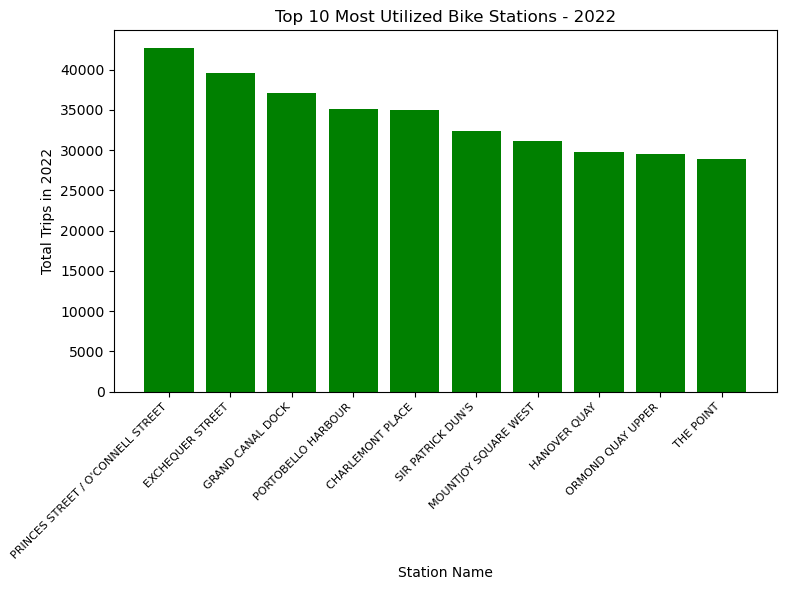

In [123]:
plt.figure(figsize=(8, 6))
plt.bar(dublin_top_10_usage['station'], dublin_top_10_usage['total_trips_per_station'], color='green')
plt.xlabel('Station Name')
plt.ylabel('Total Trips in 2022')
plt.title('Top 10 Most Utilized Bike Stations - 2022')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

DublinBikes: Top 10 least utilized docks.

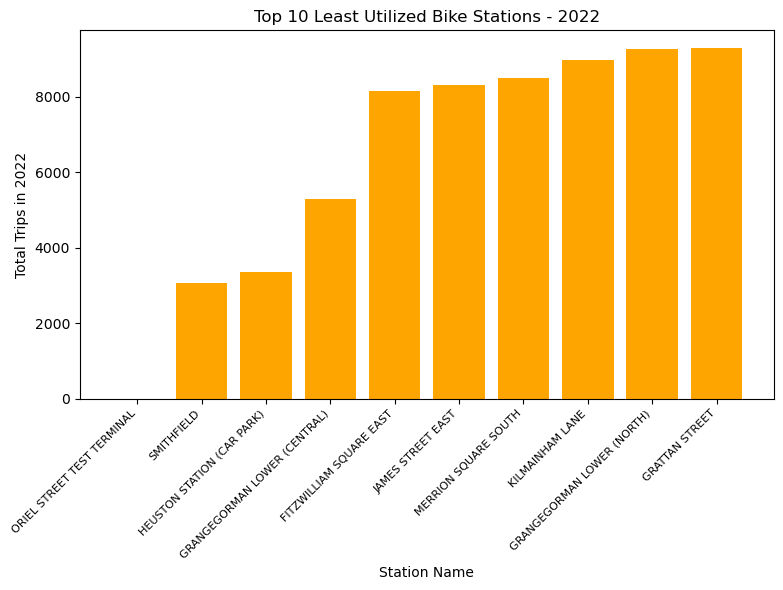

In [125]:
plt.figure(figsize=(8, 6))
plt.bar(dublin_bottom_10_usage['station'], dublin_bottom_10_usage['total_trips_per_station'], color='orange')
plt.xlabel('Station Name')
plt.ylabel('Total Trips in 2022')
plt.title('Top 10 Least Utilized Bike Stations - 2022')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

 BlueBikes Boston: Top 10 most utilized docks.

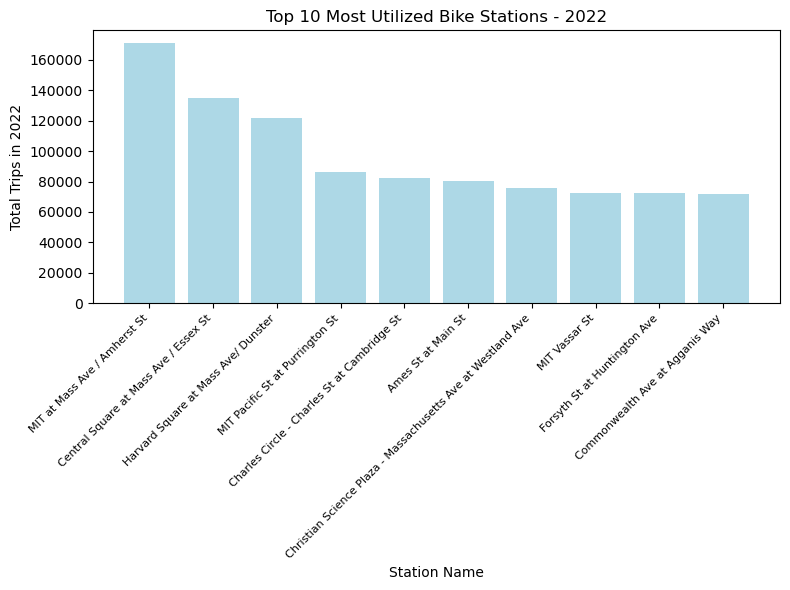

In [127]:
plt.figure(figsize=(8, 6))
plt.bar(boston_top_10_usage['station_name'], boston_top_10_usage['total_trips'], color='lightBlue')
plt.xlabel('Station Name')
plt.ylabel('Total Trips in 2022')
plt.title('Top 10 Most Utilized Bike Stations - 2022')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

 BlueBikes Boston: Top 10 least utilized docks.

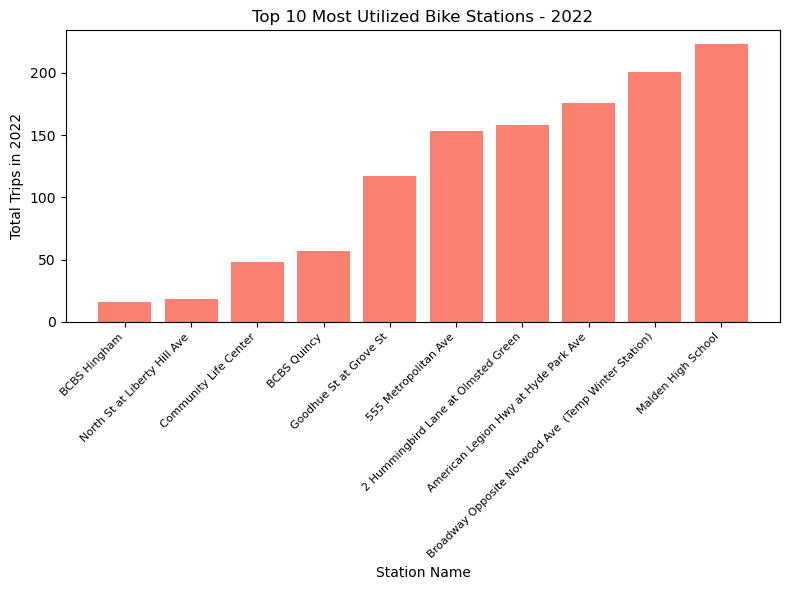

In [129]:
plt.figure(figsize=(8, 6))
plt.bar(boston_bottom_10_usage['station_name'], boston_bottom_10_usage['total_trips'], color='salmon')
plt.xlabel('Station Name')
plt.ylabel('Total Trips in 2022')
plt.title('Top 10 Most Utilized Bike Stations - 2022')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

## 2.3. Number of trips by weekday and month.